In [120]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Import data
immigration_data = pd.read_csv('98100349.csv')


In [121]:
# Explore data shape
print('Data Shape:\n', immigration_data.shape, '\n')

# Print a summary of non-missing values and data types in the immigration_data DataFrame
print('Data Info:\n',immigration_data.info())


Data Shape:
 (4541400, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541400 entries, 0 to 4541399
Data columns (total 24 columns):
 #   Column                                                   Dtype  
---  ------                                                   -----  
 0   REF_DATE                                                 int64  
 1   GEO                                                      object 
 2   DGUID                                                    object 
 3   Age (15C)                                                object 
 4   Gender (3)                                               object 
 5   Statistics (2)                                           object 
 6   Place of birth (290)                                     object 
 7   Coordinate                                               object 
 8   Period of immigration (8):Total immigrant population[1]  float64
 9   Symbol                                                   float64
 10  Period of imm

In [122]:
# Print summary statistics for numerical columns in immigration_data DataFrame
print('Numerical Columns Stat:\n', immigration_data.describe())

Numerical Columns Stat:
         REF_DATE  Period of immigration (8):Total immigrant population[1]  \
count  4541400.0                                       4.541400e+06         
mean      2021.0                                       2.422172e+02         
std          0.0                                       1.543089e+04         
min       2021.0                                       0.000000e+00         
25%       2021.0                                       0.000000e+00         
50%       2021.0                                       0.000000e+00         
75%       2021.0                                       0.000000e+00         
max       2021.0                                       8.361505e+06         

       Symbol  Period of immigration (8):Before 1980[2]  Symbol.1  \
count     0.0                              4.541400e+06       0.0   
mean      NaN                              4.090331e+01       NaN   
std       NaN                              2.990485e+03       NaN   
min  

In [123]:
# Comment.
print('Comment:\n', '>> immigration_data contains 4.5 million of immigration data including Geo Locations, Place of Birth Age,\n',
      'Gender and immigration period from 1980 through 2021.\n',
      '>> If you looked very closely, you might have noticed that the symbol.. columns are empty.\n',
      '>> This is because the numerical data are in whole number and does not require any symbol.\n',
      '>> We need to clean the data by removing the symbol.. columns')

Comment:
 >> immigration_data contains 4.5 million of immigration data including Geo Locations, Place of Birth Age,
 Gender and immigration period from 1980 through 2021.
 >> If you looked very closely, you might have noticed that the symbol.. columns are empty.
 >> This is because the numerical data are in whole number and does not require any symbol.
 >> We need to clean the data by removing the symbol.. columns


In [124]:
# Select the columns that we need.
immigration_data_clean = immigration_data[['GEO','DGUID','Age (15C)', 'Gender (3)', 'Statistics (2)', 'Place of birth (290)',\
    'Period of immigration (8):Before 1980[2]','Period of immigration (8):1980 to 1990[3]', 'Period of immigration (8):1991 to 2000[4]',\
        'Period of immigration (8):2001 to 2005[5]','Period of immigration (8):2006 to 2010[6]', 'Period of immigration (8):2011 to 2015[7]',\
            'Period of immigration (8):2016 to 2021[8]']]

# Explore the data in immigration_data_clean.
print('Data Shape:\n', immigration_data_clean.shape, '\n')
print('Data Info:\n',immigration_data_clean.info(), '\n')
print('Numerical Columns Stat:\n', immigration_data_clean.describe())

Data Shape:
 (4541400, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541400 entries, 0 to 4541399
Data columns (total 13 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   GEO                                        object 
 1   DGUID                                      object 
 2   Age (15C)                                  object 
 3   Gender (3)                                 object 
 4   Statistics (2)                             object 
 5   Place of birth (290)                       object 
 6   Period of immigration (8):Before 1980[2]   float64
 7   Period of immigration (8):1980 to 1990[3]  float64
 8   Period of immigration (8):1991 to 2000[4]  float64
 9   Period of immigration (8):2001 to 2005[5]  float64
 10  Period of immigration (8):2006 to 2010[6]  float64
 11  Period of immigration (8):2011 to 2015[7]  float64
 12  Period of immigration (8):2016 to 2021[8]  float64
dtypes: float64(7)

In [125]:
# Comment.
print('Comment:\n', '>> The number of columns has been reduced from 22 to 13.\n',
      '>> Lets explore the data further by looking at the unique values in each column.\n')

Comment:
 >> The number of columns has been reduced from 22 to 13.
 >> Lets explore the data further by looking at the unique values in each column.



In [126]:
# Filter the DataFrame for object columns only
non_numeric = immigration_data_clean.select_dtypes('object')

# Loop through columns.
for col in non_numeric.columns:
    # Select unique values in column
    print('The number of unique vqlues in non numeric columns:\n')
    print(f'The number of unique values in {col}:', non_numeric[col].nunique(), '\n')



The number of unique vqlues in non numeric columns:

The number of unique values in GEO: 174 

The number of unique vqlues in non numeric columns:

The number of unique values in DGUID: 174 

The number of unique vqlues in non numeric columns:

The number of unique values in Age (15C): 15 

The number of unique vqlues in non numeric columns:

The number of unique values in Gender (3): 3 

The number of unique vqlues in non numeric columns:

The number of unique values in Statistics (2): 2 

The number of unique vqlues in non numeric columns:

The number of unique values in Place of birth (290): 290 



In [127]:
# Get the unique values in GEO column of immigration_data_clean.
print('Unique Values in GEO Col:\n', immigration_data_clean['GEO'].unique(), '\n')

# Count the values associated with each GEO in immigration_data_clean.
print('Count of values per Unique Values in GEO Col:\n', immigration_data_clean['GEO'].value_counts().sort_values(ascending=True), '\n')

Unique Values in GEO Col:
 ['Canada' 'Newfoundland and Labrador' 'Corner Brook (CA), N.L.'
 'Gander (CA), N.L.' 'Grand Falls-Windsor (CA), N.L.'
 "St. John's (CMA), N.L." 'Prince Edward Island'
 'Charlottetown (CA), P.E.I.' 'Summerside (CA), P.E.I.' 'Nova Scotia'
 'Cape Breton (CA), N.S.' 'Halifax (CMA), N.S.' 'Kentville (CA), N.S.'
 'New Glasgow (CA), N.S.' 'Truro (CA), N.S.' 'New Brunswick'
 'Bathurst (CA), N.B.' 'Campbellton (CA), N.B./Que.'
 'Campbellton (New Brunswick part) (CA), N.B.'
 'Campbellton (Quebec part) (CA), Que.' 'Edmundston (CA), N.B.'
 'Fredericton (CMA), N.B.' 'Miramichi (CA), N.B.' 'Moncton (CMA), N.B.'
 'Saint John (CMA), N.B.' 'Quebec' 'Alma (CA), Que.' 'Amos (CA), Que.'
 'Baie-Comeau (CA), Que.' 'Cowansville (CA), Que.'
 'Dolbeau-Mistassini (CA), Que.' 'Drummondville (CMA), Que.'
 'Granby (CA), Que.' 'Joliette (CA), Que.' 'Lachute (CA), Que.'
 'Matane (CA), Que.' 'Montréal (CMA), Que.' 'Québec (CMA), Que.'
 'Rimouski (CA), Que.' 'Rivière-du-Loup (CA), Que.'
 'Ro

In [128]:
# Comment.
print('Comment:\n', '>> The GEO column contains 174 unique values.\n',
      '>> Each of the unique values appeared 26,100 times in the column.\n',
      '>> The GEO column contains the names of the province and territory in Canada(metadata).\n',
      '>> I need to separate the metadata from the data.\n',
      '>> I will create a new columns called Country, Province, and Locations and then populate it with the metadata in GEO column.\n',
      '>> I observed that the locations under each provinces end with the abbreviation of the province name.\n',
      '>> I will use this information to separate the metadata from the data.\n')

Comment:
 >> The GEO column contains 174 unique values.
 >> Each of the unique values appeared 26,100 times in the column.
 >> The GEO column contains the names of the province and territory in Canada(metadata).
 >> I need to separate the metadata from the data.
 >> I will create a new columns called Country, Province, and Locations and then populate it with the metadata in GEO column.
 >> I observed that the locations under each provinces end with the abbreviation of the province name.
 >> I will use this information to separate the metadata from the data.



In [129]:
# Create a list of province in Canada.
province = ["Newfoundland and Labrador","Prince Edward Island","Nova Scotia","New Brunswick","Quebec","Ontario",
            "Manitoba","Saskatchewan","Alberta","British Columbia","Yukon","Northwest Territories", "Nunavut"]

# Create Newfoundland and Labrador to capture the locations under the province from the GEO column.
n_l = " N.L."

# Create Prince Edward Island to capture the locations under the province from the GEO column.
pei = " P.E.I."

# Create Nova Scotia to capture the locations under the province from the GEO column.
ns = " N.S."

# Create New Brunswick to capture the locations under the province from the GEO column.
nb = " N.B."

# Create Quebec to capture the locations under the province from the GEO column.
qc = " Que."

# Create Ontario to capture the locations under the province from the GEO column.                    
on = " Ont."

# Create Manitoba to capture the locations under the province from the GEO column.                                 
man = " Man."

# Create Saskatchewan to capture the locations under the province from the GEO column.  
sask = " Sask."
    
# Create Alberta to capture the locations under the province from the GEO column.  
alta = " Alta."
            
# Create British Columbia to capture the locations under the province from the GEO column.
bc = " B.C."
                
# Create Yukon to capture the locations under the province from the GEO column.
yt = " Y.T."

# Create Northwest Territories to capture the locations under the province from the GEO column.
nwt = " N.W.T."

nnv = "Nunavut"




In [ ]:
# Create conditions for values for locations in  province to be created.
conditions = [
    (immigration_data_clean['GEO'].str.contains(n_l)),
    (immigration_data_clean['GEO'].str.contains(pei)),
    (immigration_data_clean['GEO'].str.contains(ns)),
    (immigration_data_clean['GEO'].str.contains(nb)),
    (immigration_data_clean['GEO'].str.contains(qc)),
    (immigration_data_clean['GEO'].str.contains(on)),
    (immigration_data_clean['GEO'].str.contains(man)),
    (immigration_data_clean['GEO'].str.contains(sask)),
    (immigration_data_clean['GEO'].str.contains(alta)),
    (immigration_data_clean['GEO'].str.contains(bc)),
    (immigration_data_clean['GEO'].str.contains(yt)),
    (immigration_data_clean['GEO'].str.contains(nwt)),
    (immigration_data_clean['GEO'].str.contains(nnv))
]

# Apply the conditions to create the locations in province.
immigration_data_clean['Destination(Province)'] = np.select(conditions, province, default='Other')

In [131]:
# Print the unique values in Province column.
print('List of Provinces: \n', immigration_data_clean['Destination(Province)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The Province column contains 13 unique provinces and other.\n',
      '>> I need to confirm the locations that are grouped in "Other" to confirm that all required locations are captured.\n',
      '>> After confirmation, I will remove the records these records.\n')

List of Provinces: 
 ['Other' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories' 'Nunavut'] 

Comment:
 >> The Province column contains 13 unique provinces and other.
 >> I need to confirm the locations that are grouped in "Other" to confirm that all required locations are captured.
 >> After confirmation, I will remove the records these records.



In [132]:
# Print the unique values in GEO column where province is "Other".
other_data = immigration_data_clean[immigration_data_clean['Destination(Province)'] == 'Other']
print(other_data['GEO'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The unique locations under "Other" are all provinces and "Canada".\n',
      '>> This means all locations are captured.\n',
      '>> I will remove the records under "Other" in Province column.\n')

['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories'] 

Comment:
 >> The unique locations under "Other" are all provinces and "Canada".
 >> This means all locations are captured.
 >> I will remove the records under "Other" in Province column.



In [133]:
# Remove the records under "Other" in Province column.
not_other = ~immigration_data_clean['Destination(Province)'].isin(['Other'])
immigration_data_clean1 = immigration_data_clean[not_other]

print('Table shape when it contains "Other":',immigration_data_clean.shape)
print('Table shape without "Other" records:', immigration_data_clean1.shape, '\n')
print(immigration_data_clean1['Destination(Province)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The records under "Other" has been removed.\n',
      '>> I will now create a new column called Country and populate it with Canada.\n')

Table shape when it contains "Other": (4541400, 14)
Table shape without "Other" records: (4202100, 14) 

['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories' 'Nunavut'] 

Comment:
 >> The records under "Other" has been removed.
 >> I will now create a new column called Country and populate it with Canada.



In [ ]:
# Create a new column called Country and populate it with Canada.
# Create a list of country.
country = ["Canada"]

# Create Newfoundland and Labrador to capture the locations under the province from the GEO column.
ca = "Newfoundl|Prince|Nova|Brunswick|Quebe|Ontari|Manito|askatchewan|Albert|Britis|Columbi|Yuko|Northwest|Nunavu"

# Create conditions.
conditions = [
    (immigration_data_clean1['Destination(Province)'].str.contains(ca))
]

# Apply the conditions.
immigration_data_clean1['Destination(Country)'] = np.select(conditions, country, default='Other')


In [135]:
# Check the unique values in Country column.
print(immigration_data_clean1['Destination(Country)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> There are some locations have the same name but are in different locations\n',
      '>> These locations have a mini group with a "/" in between abbrieviation in the "GEO" column.\n',
      '>> I will remove these mini groups.\n',
      '>> First, lets explore the data')

['Canada'] 

Comment:
 >> There are some locations have the same name but are in different locations
 >> These locations have a mini group with a "/" in between abbrieviation in the "GEO" column.
 >> I will remove these mini groups.
 >> First, lets explore the data


In [136]:
# Select data where GEO is Hawkesbury.
unique_camp = immigration_data_clean1['GEO'].str.contains('Hawkesbury')
imm = immigration_data_clean1[unique_camp]
print('Unique values in GEO column where GEO is Hawkesbury:\n', imm['GEO'].unique(), '\n')

Unique values in GEO column where GEO is Hawkesbury:
 ['Hawkesbury (CA), Ont./Que.' 'Hawkesbury (Ontario part) (CA), Ont.'
 'Hawkesbury (Quebec part) (CA), Que.'] 



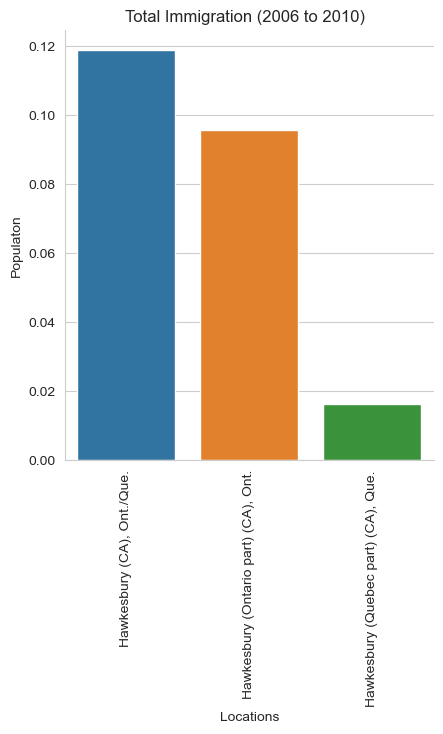

Immigration by GEO:
                                       Total_immigrant
GEO                                                  
Hawkesbury (CA), Ont./Que.                     3100.0
Hawkesbury (Ontario part) (CA), Ont.           2500.0
Hawkesbury (Quebec part) (CA), Que.             425.0 

Comment:
 >> The data shows that there are two "Hawkesbury" in Canada.
 >> One is in Ontario and the other is in Quebec.
 >> The third Hawkesbury is the sub total
 >> I will remove the mini groups by removing the records that contains "/" in the GEO column.



In [137]:
# Plot a bar chart of the total immigration from 2006 to 2010 in Hawkesbury.
g = sns.catplot(x='GEO', y='Period of immigration (8):2006 to 2010[6]', data=imm, kind='bar', errorbar=None)
# Set the title of the plot.    
g.fig.suptitle('Total Immigration (2006 to 2010)', y=1.01)
# Set the axis labels.
g.set(xlabel = 'Locations', ylabel = 'Populaton')
plt.xticks(rotation=90)
plt.show()

# Group the immigration between 2006 and 2010 by GEO.
print('Immigration by GEO:\n', imm.groupby('GEO').agg(Total_immigrant = ('Period of immigration (8):2006 to 2010[6]', 'sum')), '\n')

# Comment.
print('Comment:\n', '>> The data shows that there are two "Hawkesbury" in Canada.\n',
      '>> One is in Ontario and the other is in Quebec.\n',
      '>> The third Hawkesbury is the sub total\n',
      '>> I will remove the mini groups by removing the records that contains "/" in the GEO column.\n')



In [138]:
# Remove the mini groups by removing the records that contains "/" in the GEO column.
not_mini_grp = ~immigration_data_clean1['GEO'].str.contains('/')
immigration_data_no_minigrp = immigration_data_clean1[not_mini_grp]

# Print data shape.
print('Data shape with mini groups:', immigration_data_clean1.shape)
print('Data shape without mini groups:',immigration_data_no_minigrp.shape, '\n')

# Comment.
print('Comment:\n', '>> The mini groups have been removed.\n',
      '>> Lets explore other categorical columns.\n')

Data shape with mini groups: (4202100, 15)
Data shape without mini groups: (4097700, 15) 

Comment:
 >> The mini groups have been removed.
 >> Lets explore other categorical columns.



In [139]:
# Print the categorical columns.
cat_col = immigration_data_no_minigrp.select_dtypes('object')
print('Categorical columns:\n', cat_col.columns, '\n')

# Get the unique values in DGUID column.
print('No of unique values in "DGUID" column:', immigration_data_no_minigrp['DGUID'].nunique(), '\n')
print(immigration_data_no_minigrp['DGUID'].unique(), '\n')

Categorical columns:
 Index(['GEO', 'DGUID', 'Age (15C)', 'Gender (3)', 'Statistics (2)',
       'Place of birth (290)', 'Destination(Province)',
       'Destination(Country)'],
      dtype='object') 

No of unique values in "DGUID" column: 157 

['2021S0504015' '2021S0504011' '2021S0504010' '2021S0503001'
 '2021S0504105' '2021S0504110' '2021S0504225' '2021S0503205'
 '2021S0504210' '2021S0504220' '2021S0504215' '2021S0504328'
 '2021S050613330' '2021S050624330' '2021S0504335' '2021S0503320'
 '2021S0504329' '2021S0503305' '2021S0503310' '2021S0504410'
 '2021S0504481' '2021S0504406' '2021S0504437' '2021S0504411'
 '2021S0503447' '2021S0504450' '2021S0504456' '2021S0504468'
 '2021S0504403' '2021S0503462' '2021S0503421' '2021S0504404'
 '2021S0504405' '2021S0504485' '2021S0503408' '2021S0504428'
 '2021S0504452' '2021S0504467' '2021S0504423' '2021S0504465'
 '2021S0504412' '2021S0504444' '2021S0503433' '2021S0504454'
 '2021S0504430' '2021S0503442' '2021S0504480' '2021S0504440'
 '2021S0503568' '

In [140]:
# Get the unique values in Age column.
print('No of unique values in "Age (15C)" column:', immigration_data_no_minigrp['Age (15C)'].nunique(), '\n')
print(immigration_data_no_minigrp['Age (15C)'].unique(), '\n')

# Comment
print('Comment:\n', '>> The Age column contains 15 unique values.\n',
      '>> I will separate the metadata into four groups.\n')

No of unique values in "Age (15C)" column: 15 

['Total - Age' '0 to 14 years' '15 years and over' '15 to 24 years'
 '15 to 19 years' '20 to 24 years' '25 to 64 years' '25 to 54 years'
 '25 to 34 years' '35 to 44 years' '45 to 54 years' '55 to 64 years'
 '65 years and over' '65 to 74 years' '75 years and over'] 

Comment:
 >> The Age column contains 15 unique values.
 >> I will separate the metadata into four groups.



In [141]:
# Create a list of Age Grp 2.
age_grp2 = ['0 to 14 years','15 to 19 years','20 to 24 years','25 to 54 years','55 to 64 years','65 to 74 years','75 years and over']

# Create 0 to 14 years to capture the age range.
a1 = "0 to 14 year"

# Create 15 to 19 years to capture the age range.
a2 = "15 to 19 ye"

# Create 20 to 24 years to capture the age range.
a3 = "20 to 24"

# Create 25 to 54 years to capture the age range.
a4 = "25 to 34|35 to 44|45 to 54"

# Create 55 to 64 years to capture the age range.
a5 = "55 to 64"

# Create 65 to 74 years to capture the age range.
a6 = "65 to 74"

# Create 75 years and over to capture the age range.
a7 = "75 years a"

In [ ]:
# Create conditions for age group 2 to be created.
conditions = [
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a1)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a2)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a3)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a4)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a5)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a6)),
    (immigration_data_no_minigrp['Age (15C)'].str.contains(a7))
]

# Apply the conditions to create the locations in province.
immigration_data_no_minigrp['Immgrants Age (Age Grp2)'] = np.select(conditions, age_grp2, default='Other')

In [143]:
# Get the unique values in Age Grp2 column.
print('Unique values in Age Grp2 Column:\n', immigration_data_no_minigrp['Immgrants Age (Age Grp2)'].unique(), '\n')

# Check the unique values in "Other" to confirm that all required age ranges are captured.
grp_other = immigration_data_no_minigrp[immigration_data_no_minigrp['Immgrants Age (Age Grp2)'] == 'Other']
print('Unique values in Age Grp2 Column where Age Grp2 is "Other":\n', grp_other['Age (15C)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> Remove the records group as "Other"\n')

Unique values in Age Grp2 Column:
 ['Other' '0 to 14 years' '15 to 19 years' '20 to 24 years'
 '25 to 54 years' '55 to 64 years' '65 to 74 years' '75 years and over'] 

Unique values in Age Grp2 Column where Age Grp2 is "Other":
 ['Total - Age' '15 years and over' '15 to 24 years' '25 to 64 years'
 '25 to 54 years' '65 years and over'] 

Comment:
 >> Remove the records group as "Other"



In [144]:
# Remove the records group as "Other".
not_other_age = ~immigration_data_no_minigrp['Immgrants Age (Age Grp2)'].isin(['Other'])
immigration_data_age_grp2 = immigration_data_no_minigrp[not_other_age]

In [145]:
# Create a list of Age Grp 3.
age_grp3 = ['0 to 14 years','15 to 24 years','25 to 64 years','65 years and over']

# Create 0 to 14 years to capture the age range.
b1 = "0 to 14 year"

# Create 15 to 24 years to capture the age range.
b2 = "15 to 19 ye|20 to 24"

# Create 25 to 64 years to capture the age range.
b3 = "25 to 54|55 to 64"

# Create 65 years and over to capture the age range.
b4 = "65 to 74|75 years and ov"


In [ ]:
# Create conditions for age group 3 to be created.
conditions = [
    (immigration_data_age_grp2['Immgrants Age (Age Grp2)'].str.contains(b1)),
    (immigration_data_age_grp2['Immgrants Age (Age Grp2)'].str.contains(b2)),
    (immigration_data_age_grp2['Immgrants Age (Age Grp2)'].str.contains(b3)),
    (immigration_data_age_grp2['Immgrants Age (Age Grp2)'].str.contains(b4))
]

# Apply the conditions to create the locations in province.
immigration_data_age_grp2['Immgrants Age (Age Grp3)'] = np.select(conditions, age_grp3, default='Other')

In [147]:
# Get the unique values in Age Grp3 column.
print('Unique values in Age Grp3 Column:\n', immigration_data_age_grp2['Immgrants Age (Age Grp3)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> Create Group 4 age column\n')


Unique values in Age Grp3 Column:
 ['0 to 14 years' '15 to 24 years' '25 to 64 years' '65 years and over'] 

Comment:
 >> Create Group 4 age column



In [148]:
# Create a list of Age Grp 4.
age_grp4 = ['0 to 14 years','15 years and over']

# Create 0 to 14 years to capture the age range.
c1 = "0 to 14 year"

# Create 15 to 24 years to capture the age range.
c2 = "15 to 24 ye|25 to 64 ye|65 years and o"

In [ ]:
# Create conditions for age group 4 to be created.
conditions = [
    (immigration_data_age_grp2['Immgrants Age (Age Grp3)'].str.contains(c1)),
    (immigration_data_age_grp2['Immgrants Age (Age Grp3)'].str.contains(c2))
]

# Apply the conditions to create the locations in province.
immigration_data_age_grp2['Immgrants Age (Age Grp4)'] = np.select(conditions, age_grp4, default='Other')

In [150]:
# Get the unique values in Age Grp4 column.
print('Unique values in Age Grp4 Column:\n', immigration_data_age_grp2['Immgrants Age (Age Grp3)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The Age column has been separated into four groups.\n',
      '>> Lets explore the data in the gender column.\n')

Unique values in Age Grp4 Column:
 ['0 to 14 years' '15 to 24 years' '25 to 64 years' '65 years and over'] 

Comment:
 >> The Age column has been separated into four groups.
 >> Lets explore the data in the gender column.



In [151]:
# Get the unique values in the gender column.
print('Unique values in gender column:', immigration_data_age_grp2['Gender (3)'].unique(), '\n')

# Remove the "Total-Gender" from the records.
not_tot_gend = ~immigration_data_age_grp2['Gender (3)'].isin(['Total - Gender'])
immigration_data_gender = immigration_data_age_grp2[not_tot_gend]

# Get the unique values in gender column.
print('Unique values in gender column:', immigration_data_gender['Gender (3)'].unique(), '\n')
print('Data Shape:', immigration_data_gender.shape, '\n')   

Unique values in gender column: ['Total - Gender' 'Men+' 'Women+'] 

Unique values in gender column: ['Men+' 'Women+'] 

Data Shape: (1639080, 18) 



In [152]:
# Explore the data in the Statistics column.
print('Unique columns in statistic column:\n', immigration_data_gender['Statistics (2)'].unique(), '\n')

# Remove the "% distribution (2021)" from the records.
no_dist = ~immigration_data_gender['Statistics (2)'].isin(['% distribution (2021)'])
immigration_data_stat = immigration_data_gender[no_dist]

# Get the shape of the data.
print('Data Shape:', immigration_data_stat.shape, '\n')

Unique columns in statistic column:
 ['2021 Counts' '% distribution (2021)'] 

Data Shape: (819540, 18) 



In [153]:
# Explore the data in the Place of birth column.
print('No of Unique columns in statistic column:\n', immigration_data_stat['Place of birth (290)'].nunique(), '\n')
print('Unique columns in statistic column:\n', immigration_data_stat['Place of birth (290)'].unique(), '\n')

No of Unique columns in statistic column:
 290 

Unique columns in statistic column:
 ['Total – Place of birth' 'Inside Canada' 'Newfoundland and Labrador'
 'Prince Edward Island' 'Nova Scotia' 'New Brunswick' 'Quebec' 'Ontario'
 'Manitoba' 'Saskatchewan' 'Alberta' 'British Columbia' 'Yukon'
 'Northwest Territories' 'Nunavut' 'Outside Canada' 'Americas'
 'North America' 'Greenland' 'Saint Pierre and Miquelon'
 'United States of America' 'Central America' 'Belize' 'Costa Rica'
 'El Salvador' 'Guatemala' 'Honduras' 'Mexico' 'Nicaragua' 'Panama'
 'Caribbean and Bermuda' 'Anguilla' 'Antigua and Barbuda' 'Aruba'
 'Bahamas' 'Barbados' 'Bermuda' 'Bonaire, Sint Eustatius and Saba'
 'Cayman Islands' 'Cuba' 'Curaçao' 'Dominica' 'Dominican Republic'
 'Grenada' 'Guadeloupe' 'Haiti' 'Jamaica' 'Martinique' 'Montserrat'
 'Puerto Rico' 'Saint Barthélemy' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Martin (French part)' 'Saint Vincent and the Grenadines'
 'Sint Maarten (Dutch part)' 'Trinidad and Tob

In [154]:
# Comment.
print('Comment:\n', '>> I will create two groups out of the Place of Birth column.\n',
      '>> The first group will contain the location and the second group will contain the continents.\n')

Comment:
 >> I will create two groups out of the Place of Birth column.
 >> The first group will contain the location and the second group will contain the continents.



In [155]:
# Create a list of region.
region = ['North America','Central America','Caribbean and Bermuda','South America','Western Europe','Eastern Europe',
          'Northern Europe','Southern Europe','Western Africa','Eastern Africa','Northern Africa','Central Africa','Southern Africa',
          'West Central Asia and the Middle East','Eastern Asia','Southeast Asia','Southern Asia','Oceania','Antarctica and Adjacent Islands',
          'Other','Inside Canada']


# Create North America to capture countries under the region.
na = "Greenlan|Saint Pierre and Miquelo|United States of Americ"

# Create Central America to capture countries under the region.
ca = "Beliz|Costa Ric|El Salvado|Guatemal|Hondura|Mexic|Nicaragu|Panam"

# Create Caribbean and Bermuda to capture countries under the region.
cb = "Anguill|Antigua and Barbud|Arub|Bahama|Barbado|Bermud|Bonaire, Sint Eustatius and Sab|Cayman Island|Cuba|Curaça|Dominic|\
    Dominican Republi|Grenad|Guadeloup|Hait|Jamaic|Martiniqu|Montserra|Puerto Ric|Saint Barthélem|Saint Kitts and Nevi|Saint Luci|Saint Martin|\
        Saint Vincent and the Grenadine|Sint Maarten|Trinidad and Tobag|Turks and Caicos Island|Virgin Islands, Britis|Virgin Islands, United State"

# Create South America to capture countries under the region.
sa = "Argentin|Bolivi|Brazi|Chil|Colombi|Ecuado|Falkland Island|French Guian|Guyan|Paragua|Peru|\
    South Georgia and the South Sandwich Islands|Surinam|Urugua|Venezuel"
    
# Create Western Europe to capture countries under the region.
we = "Austri|Belgiu|Franc|German|Liechtenstei|Luxembour|Monac|Netherland|Switzerlan"

# Create Eastern Europe to capture countries under the region.
ee = "Belaru|Bulgari|Czechi|Estoni|Hungar|Latvi|Lithuani|Moldov|Polan|Romani|Russian Federatio|Slovaki|Ukrain"

# Create Northern Europe to capture countries under the region.
ne = "Åland Island|Denmar|Faroe Island|Finlan|Guernse|Icelan|Irelan|Isle of Ma|Jerse|Norwa|Sark|Svalbard and Jan Maye|Swede|United Kingdo"

# Create Southern Europe to capture countries under the region.
se = "Albani|Andorr|Bosnia and Herzegovin|Croati|Gibralta|Greec|Holy See|Italy|Kosov|Malta|Montenegr|North Macedoni|Portuga|San Marin|Serbi|Sloveni|Spain"

# Create Western Africa to capture countries under the region.
waf = "Beni|Burkina Fas|Cabo Verd|Côte d'Ivoir|Gambi|Ghana|Guine|Guinea-Bissa|Liberi|Mali|Mauritani|Niger|Nigeri|Saint Helena, Ascension and Tristan da Cunha|Senega|Sierra Leon|Togo"
    
# Create Eastern Africa to capture countries under the region.
eaf = "Burund|Comoro|Djibout|Eritre|Ethiopi|Kenya|Madagasca|Malaw|Mauritiu|Mayotte|Mozambiqu|Réunio|Rwanda|Seychelle|Somali|\
    South Suda|Tanzani|Uganda|Zambi|Zimbabw"
    
# Create Northern Africa to capture countries under the region.
naf = "Algeri|Egyp|Liby|Morocc|Sudan|Tunisi|Western Sahar"

# Create Central Africa to capture countries under the region.
caf = "Angol|Cameroo|Central African Republi|Chad|Congo, Democratic Republic of th|Congo, Republic of th|Equatorial Guine|Gabon|Sao Tome and Princip"

# Create Southern Africa to capture countries under the region.
saf = "Botswan|Eswatin|Lesoth|Namibi|South Africa, Republic o"

# Create West Central Asia and the Middle East to capture countries under the region.
wcam = "Afghanista|Armeni|Azerbaija|Bahrai|Cypru|Georgi|Iran|Iraq|Israe|Jorda|Kazakhsta|Kuwait|Kyrgyzsta|Lebano|Oman|Qatar|Saudi Arabia|Syria|Tajikista|Turke|Turkmenista|United Arab Emirate|Uzbekista|West Bank and Gaza Stri|Yemen"
    
# Create Eastern Asia to capture countries under the region.
eas = "China|Hong Kon|Japan|Korea, Nort|Korea, Sout|Maca|Mongoli|Taiwa"

# Create Southeast Asia to capture countries under the region.
seas = "Brunei Darussala|Cambodi|Indonesi|Lao|Malaysi|Myanma|Philippine|Singapor|Thailan|Timor-Lest|Viet Na"

# Create Southern Asia to capture countries under the region.
sas = "Banglades|Bhuta|British Indian Ocean Territor|India|Maldive|Nepa|Pakista|Sri Lanka"

# Create Oceania to capture countries under the region.
ocn = "American Samo|Australi|Christmas Islan|Cocos|Cook Island|Fij|French Polynesi|Guam|Kiribat|Marshall Island|Micronesia, Federated States of|Nauru|New Caledoni|New Zealan|Niue|Norfolk Islan|Northern Mariana Island|Palau|Papua New Guine|Pitcair|Samoa|Solomon Island|Tokela|Tong|Tuval|United States Minor Outlying Island|Vanuat|Wallis and Futuna"

# Create Antarctica and Adjacent Islands to capture countries under the region.
aaj = "Antarctic|Bouvet Islan|French Southern Territorie|Heard Island and McDonald Island"

# Create Other to capture countries under the region.
oth = "Othe"

# Create Inside Canada to capture countries under the region.
inc = "Newfoundland and Labrado|Prince Edward Islan|Nova Scoti|New Brunswic|Quebe|Ontari|Manitob|Saskatchewa|Albert|British Columbi|Yuko|Northwest Territories|Nunavu"




In [ ]:
# Create conditions for regions to be created.
conditions = [
    (immigration_data_stat['Place of birth (290)'].str.contains(na)),
    (immigration_data_stat['Place of birth (290)'].str.contains(ca)),
    (immigration_data_stat['Place of birth (290)'].str.contains(cb)),
    (immigration_data_stat['Place of birth (290)'].str.contains(sa)),
    (immigration_data_stat['Place of birth (290)'].str.contains(we)),
    (immigration_data_stat['Place of birth (290)'].str.contains(ee)),
    (immigration_data_stat['Place of birth (290)'].str.contains(ne)),
    (immigration_data_stat['Place of birth (290)'].str.contains(se)),
    (immigration_data_stat['Place of birth (290)'].str.contains(waf)),
    (immigration_data_stat['Place of birth (290)'].str.contains(eaf)),
    (immigration_data_stat['Place of birth (290)'].str.contains(naf)),
    (immigration_data_stat['Place of birth (290)'].str.contains(caf)),
    (immigration_data_stat['Place of birth (290)'].str.contains(saf)),
    (immigration_data_stat['Place of birth (290)'].str.contains(wcam)),
    (immigration_data_stat['Place of birth (290)'].str.contains(eas)),
    (immigration_data_stat['Place of birth (290)'].str.contains(seas)),
    (immigration_data_stat['Place of birth (290)'].str.contains(sas)),
    (immigration_data_stat['Place of birth (290)'].str.contains(ocn)),
    (immigration_data_stat['Place of birth (290)'].str.contains(aaj)),
    (immigration_data_stat['Place of birth (290)'].str.contains(oth)),
    (immigration_data_stat['Place of birth (290)'].str.contains(inc))
]

# Apply the conditions to create Region.
immigration_data_stat['Place of Birth(Region)'] = np.select(conditions, region, default='Other')

In [157]:
# Get the unique values in Region column.
print('Unique Values in Region column:\n', immigration_data_stat['Place of Birth(Region)'].unique(), '\n')

# Get the unique values in Place of birth column where Region is "Other".
sais = immigration_data_stat[immigration_data_stat['Place of Birth(Region)'] == 'Other']
print('Unique Values in Place of birth column, grouped under Other:\n',sais['Place of birth (290)'].unique(), '\n')

# Comment.
print('Comment:\n',
      '>> The unique countries and locations inside Canada in Place of birth columng has been grouped into regions.\n',
      '>> This means all countries and location are captured.\n',
      '>> I will remove the records under "Other" in Region column.\n')

Unique Values in Region column:
 ['Other' 'Inside Canada' 'North America' 'Central America'
 'Caribbean and Bermuda' 'South America'
 'West Central Asia and the Middle East' 'Western Europe' 'Eastern Europe'
 'Northern Europe' 'Southern Europe' 'Western Africa' 'Eastern Africa'
 'Northern Africa' 'Central Africa' 'Southern Africa' 'Eastern Asia'
 'Southeast Asia' 'Southern Asia' 'Oceania'
 'Antarctica and Adjacent Islands'] 

Unique Values in Place of birth column, grouped under Other:
 ['Total – Place of birth' 'Inside Canada' 'Outside Canada' 'Americas'
 'North America' 'Central America' 'South America' 'Europe'
 'Western Europe' 'Eastern Europe' 'Northern Europe' 'Southern Europe'
 'Africa' 'Western Africa' 'Eastern Africa' 'Northern Africa'
 'Central Africa' 'Southern Africa' 'Asia'
 'West Central Asia and the Middle East' 'Eastern Asia' 'Southeast Asia'
 'Southern Asia' 'Oceania' 'Other'] 

Comment:
 >> The unique countries and locations inside Canada in Place of birth columng has

In [158]:
# Remove the "Other" from the records from region column.
not_reg_other = ~immigration_data_stat['Place of Birth(Region)'].isin(['Other'])
immigration_data_reg = immigration_data_stat[not_reg_other]

# Get the unique values in Region column.
print('Unique Values in Region column:\n', immigration_data_reg['Place of Birth(Region)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The records under "Other" has been removed.\n',
      '>> I will now create a new column called Continent and populate it with the region.\n')

Unique Values in Region column:
 ['Inside Canada' 'North America' 'Central America' 'Caribbean and Bermuda'
 'South America' 'West Central Asia and the Middle East' 'Western Europe'
 'Eastern Europe' 'Northern Europe' 'Southern Europe' 'Western Africa'
 'Eastern Africa' 'Northern Africa' 'Central Africa' 'Southern Africa'
 'Eastern Asia' 'Southeast Asia' 'Southern Asia' 'Oceania'
 'Antarctica and Adjacent Islands'] 

Comment:
 >> The records under "Other" has been removed.
 >> I will now create a new column called Continent and populate it with the region.



In [159]:
# Create a list of continent.
continent = ["Americas", "Europe",	"Africa", "Asia", "Oceania", "Antarctica and Adjacent Islands", "Inside Canada"]

# Create Americas to capture regions under the continent.
ame = "North Americ|Central Americ|Caribbean and Bermud|South America"

# Create Europe to capture regions under the continent.
eur = "Western Europ|Eastern Europ|Northern Europ|Southern Europ"

# Create Africa to capture regions under the continent.
afr = "Western Afric|Eastern Afric|Northern Afric|Central Afric|Southern Afric"

# Create Asia to capture regions under the continent.
asi = "West Central Asia and the Middle Eas|Eastern Asi|Southeast Asi|Southern Asi"

# Create Oceania to capture regions under the continent.
oce = "Ocean"

# Create Antarctica and Adjacent Islands to capture regions under the continent.
ant = "Antarctica"

# Create Inside Canada to capture regions under the continent.
inca = "Inside Cana"

In [ ]:
# Create conditions for continent to be created.
conditions = [
    (immigration_data_reg['Place of Birth(Region)'].str.contains(ame)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(eur)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(afr)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(asi)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(oce)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(ant)),
    (immigration_data_reg['Place of Birth(Region)'].str.contains(inca))
]

# Apply the conditions to create Region.
immigration_data_reg['Place of Birth(Continent)'] = np.select(conditions, continent, default='Other')

In [161]:
# Get the unique values in Continent column.
print('Unique Values in Continent column:\n', immigration_data_reg['Place of Birth(Continent)'].unique(), '\n')

# Get the unique values in Place of birth column where Region is "Other".
sai = immigration_data_reg[immigration_data_reg['Place of Birth(Continent)'] == 'Other']
print('Unique Values in Place of birth(Region) column, grouped under Other:\n',sai['Place of Birth(Region)'].unique(), '\n')

# Comment.
print('Comment:\n', '>> The unique regions in Region column has been grouped into continents.\n',
        '>> This means all regions are captured and there is no records under "Other".\n',
        '>> I will create a column to group the Continent column into two locations.\n')

Unique Values in Continent column:
 ['Inside Canada' 'Americas' 'Asia' 'Europe' 'Africa' 'Oceania'
 'Antarctica and Adjacent Islands'] 

Unique Values in Place of birth(Region) column, grouped under Other:
 [] 

Comment:
 >> The unique regions in Region column has been grouped into continents.
 >> This means all regions are captured and there is no records under "Other".
 >> I will create a column to group the Continent column into two locations.



In [162]:
# Create a list of location.
location = ["Inside Canada", "Outside Canada"]

# Create Inside Canada to capture the locations.
iic = "Inside Cana"

# Create Outside Canada to capture the locations.
otc = "America|Europ|Afric|Asi|Oceani|Antarctica and Adjacent Island"

In [ ]:
# Create conditions for locations to be created.
conditions_loc = [
    (immigration_data_reg['Place of Birth(Continent)'].str.contains(iic)),
    (immigration_data_reg['Place of Birth(Continent)'].str.contains(otc))
]

# Apply the conditions to create Region.
immigration_data_reg['Place of Birth(Locations)'] = np.select(conditions_loc, location, default='Other')

In [164]:
# Get the unique values in Locations column.
print('Unique Values in Locations column:\n', immigration_data_reg['Place of Birth(Locations)'].unique(), '\n')

# Get the shape of the data and the list of columns.
print('Data Shape:', immigration_data_reg.shape, '\n')
print('Column List:\n', immigration_data_reg.columns, '\n')

Unique Values in Locations column:
 ['Inside Canada' 'Outside Canada'] 

Data Shape: (748890, 21) 

Column List:
 Index(['GEO', 'DGUID', 'Age (15C)', 'Gender (3)', 'Statistics (2)',
       'Place of birth (290)', 'Period of immigration (8):Before 1980[2]',
       'Period of immigration (8):1980 to 1990[3]',
       'Period of immigration (8):1991 to 2000[4]',
       'Period of immigration (8):2001 to 2005[5]',
       'Period of immigration (8):2006 to 2010[6]',
       'Period of immigration (8):2011 to 2015[7]',
       'Period of immigration (8):2016 to 2021[8]', 'Destination(Province)',
       'Destination(Country)', 'Immgrants Age (Age Grp2)',
       'Immgrants Age (Age Grp3)', 'Immgrants Age (Age Grp4)',
       'Place of Birth(Region)', 'Place of Birth(Continent)',
       'Place of Birth(Locations)'],
      dtype='object') 



In [165]:
# Comment.
print('Comment:\n', '>> The categorical column has been cleaned and is ready for analysis.\n',
      '>> The data has been reduced from 4.5 million records to 748k records.\n',
      '>> Time to explore the numerical columns.\n')

Comment:
 >> The categorical column has been cleaned and is ready for analysis.
 >> The data has been reduced from 4.5 million records to 748k records.
 >> Time to explore the numerical columns.



In [166]:
# Get the numerical columns.
print('Numerical columns:\n', immigration_data_reg.info(), '\n')

# Comment.
print('Comment:\n', '>> I will change the data type of the numerical columns to int because a population number should be in integer.\n',
      '>> I will create a column titled total to sum the total population.\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748890 entries, 54522 to 4541108
Data columns (total 21 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   GEO                                        748890 non-null  object 
 1   DGUID                                      748890 non-null  object 
 2   Age (15C)                                  748890 non-null  object 
 3   Gender (3)                                 748890 non-null  object 
 4   Statistics (2)                             748890 non-null  object 
 5   Place of birth (290)                       748890 non-null  object 
 6   Period of immigration (8):Before 1980[2]   748890 non-null  float64
 7   Period of immigration (8):1980 to 1990[3]  748890 non-null  float64
 8   Period of immigration (8):1991 to 2000[4]  748890 non-null  float64
 9   Period of immigration (8):2001 to 2005[5]  748890 non-null  float64
 10  Per

In [ ]:
# Change the data type of the numerical columns to int.
immigration_data_reg['Period of immigration (8):Before 1980[2]'] = immigration_data_reg['Period of immigration (8):Before 1980[2]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):1980 to 1990[3]'] = immigration_data_reg['Period of immigration (8):1980 to 1990[3]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):1991 to 2000[4]'] = immigration_data_reg['Period of immigration (8):1991 to 2000[4]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):2001 to 2005[5]'] = immigration_data_reg['Period of immigration (8):2001 to 2005[5]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):2006 to 2010[6]'] = immigration_data_reg['Period of immigration (8):2006 to 2010[6]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):2011 to 2015[7]'] = immigration_data_reg['Period of immigration (8):2011 to 2015[7]'].astype(np.int64)
immigration_data_reg['Period of immigration (8):2016 to 2021[8]'] = immigration_data_reg['Period of immigration (8):2016 to 2021[8]'].astype(np.int64)


In [168]:
# Confirm the data type of the numerical columns.
print('Numerical columns:\n', immigration_data_reg.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748890 entries, 54522 to 4541108
Data columns (total 21 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   GEO                                        748890 non-null  object
 1   DGUID                                      748890 non-null  object
 2   Age (15C)                                  748890 non-null  object
 3   Gender (3)                                 748890 non-null  object
 4   Statistics (2)                             748890 non-null  object
 5   Place of birth (290)                       748890 non-null  object
 6   Period of immigration (8):Before 1980[2]   748890 non-null  int64 
 7   Period of immigration (8):1980 to 1990[3]  748890 non-null  int64 
 8   Period of immigration (8):1991 to 2000[4]  748890 non-null  int64 
 9   Period of immigration (8):2001 to 2005[5]  748890 non-null  int64 
 10  Period of immig

In [169]:
# Add a column to sum the total immigration.
immigration_perd = ['Period of immigration (8):Before 1980[2]', 'Period of immigration (8):1980 to 1990[3]',
                    'Period of immigration (8):1991 to 2000[4]', 'Period of immigration (8):2001 to 2005[5]',
                    'Period of immigration (8):2006 to 2010[6]', 'Period of immigration (8):2011 to 2015[7]',
                    'Period of immigration (8):2016 to 2021[8]']
immigration_data_reg['Total Immigration'] = immigration_data_reg[immigration_perd].sum(axis=1)

c:\Users\godek\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


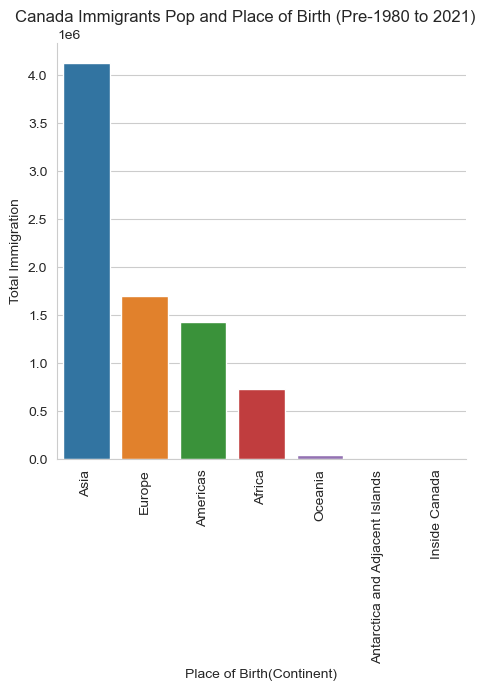

Total Immigration before 1980 to 2021:
                                 Total Immigration  Immigration Share(%)
Place of Birth(Continent)                                              
Africa                                    730,135                  9.09
Americas                                1,429,985                 17.80
Antarctica and Adjacent Islands                 0                  0.00
Asia                                    4,127,020                 51.38
Europe                                  1,696,425                 21.12
Inside Canada                                 650                  0.01
Oceania                                    47,605                  0.59
Total                                   8,031,820                100.00 



In [170]:
# Plot Total immigration by Place of Birth(Continent).
sns.set_style('whitegrid')
cont_order =  ['Asia', 'Europe','Americas', 'Africa', 'Oceania', 'Antarctica and Adjacent Islands', 'Inside Canada']
g = sns.catplot(data= immigration_data_reg, x = 'Place of Birth(Continent)', y = 'Total Immigration', kind = 'bar', errorbar=None,\
    order= cont_order, estimator=sum)

# Set the title of the plot.    
g.fig.suptitle('Canada Immigrants Pop and Place of Birth (Pre-1980 to 2021)', y = 1.01)
plt.xticks(rotation=90)
plt.show()



# Summarize the total immigration by continent.
imm_cont = immigration_data_reg.pivot_table(index = ['Place of Birth(Continent)'], values = ['Total Immigration'], aggfunc = 'sum', margins=all, 
                                            margins_name='Total')

# Calculate the % Contribution of each Continent to the total immigrants.

# Get the population for each Continent as a % of the Total immigrants


imm_cont["Immigration Share(%)"] = round(imm_cont['Total Immigration']/imm_cont['Total Immigration'].iloc[7] * 100, 2)

# Add comma separator to the numbers
cols_to_commasep = ['Total Immigration']
imm_cont[cols_to_commasep] = imm_cont[cols_to_commasep].applymap('{:,}'.format)

# Print result.
print('Total Immigration before 1980 to 2021:\n',imm_cont, '\n')

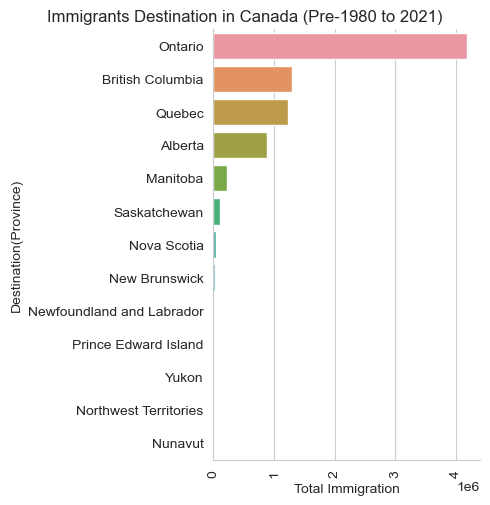

Immigrants Destination(Pre 1980 to 2021):
                           Total Immigration  Immigration Share(%)
Destination(Province)                                            
Alberta                             879,415                 10.95
British Columbia                  1,305,600                 16.26
Manitoba                            220,155                  2.74
New Brunswick                        23,275                  0.29
Newfoundland and Labrador             6,455                  0.08
Northwest Territories                 1,680                  0.02
Nova Scotia                          48,685                  0.61
Nunavut                                 905                  0.01
Ontario                           4,193,355                 52.21
Prince Edward Island                  6,690                  0.08
Quebec                            1,239,845                 15.44
Saskatchewan                        102,710                  1.28
Yukon                            

In [171]:
# Plot Total immigration by Destination(Province).
sns.set_style('whitegrid')
pro_order =  ['Ontario','British Columbia','Quebec','Alberta','Manitoba','Saskatchewan','Nova Scotia','New Brunswick','Newfoundland and Labrador',\
    'Prince Edward Island',  'Yukon', 'Northwest Territories', 'Nunavut']
f = sns.catplot(data= immigration_data_reg, y = 'Destination(Province)', x = 'Total Immigration', kind = 'bar', errorbar=None, estimator= 'sum',\
    orient='h', order= pro_order)



# Set the title of the plot.    
f.fig.suptitle('Immigrants Destination in Canada (Pre-1980 to 2021)', y = 1.01)
plt.xticks(rotation=90)
plt.show()


# Summarize the total immigration by continent.
des_prov = immigration_data_reg.pivot_table(index = ['Destination(Province)'], values = ['Total Immigration'], aggfunc = 'sum', margins=all, 
                                            margins_name='Total')

# Calculate the % Contribution of each Continent to the total immigrants.

# Get the population for each Continent as a % of the Total immigrants


des_prov["Immigration Share(%)"] = round(des_prov['Total Immigration']/des_prov['Total Immigration'].iloc[13] * 100, 2)



# Add comma separator to the numbers
cols_to_commasep = ['Total Immigration']
des_prov[cols_to_commasep] = des_prov[cols_to_commasep].applymap('{:,}'.format)

# Print result.
print('Immigrants Destination(Pre 1980 to 2021):\n',des_prov, '\n')

In [172]:
# Rename the columns.

new_cols = {'GEO':'Destination(GEO)','Age (15C)':'Immigrants Age(Grp1)','Immgrants Age (Age Grp2)':'Immigrants Age (Age Grp2)',\
    'Immgrants Age (Age Grp3)':'Immigrants Age (Age Grp3)', 'Immgrants Age (Age Grp4)':'Immigrants Age (Age Grp4)',\
        'Total Immigration':'Total Immigrants Population','Period of immigration (8):Before 1980[2]':'Before 1980',\
            'Period of immigration (8):1980 to 1990[3]':'1980 to 1990','Period of immigration (8):1991 to 2000[4]': '1991 to 2000',\
                'Period of immigration (8):2001 to 2005[5]':'2001 to 2005', 'Period of immigration (8):2006 to 2010[6]':'2006 to 2010',\
                    'Period of immigration (8):2011 to 2015[7]':'2011 to 2015','Period of immigration (8):2016 to 2021[8]':'2016 to 2021',\
                        'Place of birth (290)':'Place of Birth(Country)','Gender (3)':'Gender'}

immigration_data_reg.rename(columns = new_cols, inplace = True)
print(immigration_data_reg.columns)

Index(['Destination(GEO)', 'DGUID', 'Immigrants Age(Grp1)', 'Gender',
       'Statistics (2)', 'Place of Birth(Country)', 'Before 1980',
       '1980 to 1990', '1991 to 2000', '2001 to 2005', '2006 to 2010',
       '2011 to 2015', '2016 to 2021', 'Destination(Province)',
       'Destination(Country)', 'Immigrants Age (Age Grp2)',
       'Immigrants Age (Age Grp3)', 'Immigrants Age (Age Grp4)',
       'Place of Birth(Region)', 'Place of Birth(Continent)',
       'Place of Birth(Locations)', 'Total Immigrants Population'],
      dtype='object')
54522    Newfoundland and Labrador
54523         Prince Edward Island
54524                  Nova Scotia
54525                New Brunswick
54526                       Quebec
Name: Place of Birth(Country), dtype: object


c:\Users\godek\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [174]:
# Re-arrange the columns.
column_order = ['Place of Birth(Locations)','Place of Birth(Continent)','Place of Birth(Region)','Place of Birth(Country)',\
    'Place of Birth(Country)','Gender','Immigrants Age (Age Grp4)','Immigrants Age (Age Grp3)','Immigrants Age (Age Grp2)',\
        'Immigrants Age(Grp1)','Destination(Country)','Destination(Province)','Destination(GEO)','DGUID','Statistics (2)',\
            'Before 1980','1980 to 1990','1991 to 2000', '2001 to 2005',\
            '2006 to 2010','2011 to 2015','2016 to 2021','Total Immigrants Population']

immigration_data_reg = immigration_data_reg[column_order]

print(immigration_data_reg.columns)

Index(['Place of Birth(Locations)', 'Place of Birth(Continent)',
       'Place of Birth(Region)', 'Place of Birth(Country)',
       'Place of Birth(Country)', 'Gender', 'Immigrants Age (Age Grp4)',
       'Immigrants Age (Age Grp3)', 'Immigrants Age (Age Grp2)',
       'Immigrants Age(Grp1)', 'Destination(Country)', 'Destination(Province)',
       'Destination(GEO)', 'DGUID', 'Statistics (2)', 'Before 1980',
       '1980 to 1990', '1991 to 2000', '2001 to 2005', '2006 to 2010',
       '2011 to 2015', '2016 to 2021', 'Total Immigrants Population'],
      dtype='object')
